In [941]:
%pylab inline
from matplotlib import animation
from scipy.interpolate import *
from scipy.optimize import *

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


#Punto1
##A)

Primero, se declaran las constantes dadas por el enunciado para ser utilizadas como condiciones iniciales de posición y velocidad.

In [2]:
#Constantes de condiciones iniciales
a = 0.24250109
b = -0.0607718825
c = 0.93240737
d = 0.86473146

Se declara la funcion de derivada, que recibe como parámetro de entrada el vector de posiciones y velocidades y que, según la ley de gravitación universal de Newton, devuelve la correspondiente derivada de posición y velocidad. Para este análisis, se asume que tantos las masas como la constante de gravitación G son iguales a 1.

In [3]:
#funcion: derivada
#Y: x1(0), y1(1), x2(2), y2(3), x3(4), y3(5), v1x(6), v1y(7), v2x(8), v2y(9), v3x(10), v3y(11) 
def funcion(Y):
    #Distancia de 1 a 3.
    r13 = (np.sqrt(abs(Y[0] - Y[4])**2 + abs(Y[1] - Y[5])**2))**3
    #Distancia de 1 a 2
    r12 = (np.sqrt(abs(Y[0] - Y[2])**2 + abs(Y[1] - Y[3])**2))**3
    #Distancia de 2 a 3.
    r23 = (np.sqrt(abs(Y[2] - Y[4])**2 + abs(Y[3] - Y[5])**2))**3
    actual1x = -(Y[0] - Y[2])/r12 - (Y[0] - Y[4])/r13
    actual1y = -(Y[1] - Y[3])/r12 - (Y[1] - Y[5])/r13
    actual2x = -(Y[2] - Y[0])/r12 - (Y[2] - Y[4])/r23
    actual2y = -(Y[3] - Y[1])/r12 - (Y[3] - Y[5])/r23
    actual3x = -(Y[4] - Y[0])/r13 - (Y[4] - Y[2])/r23
    actual3y = -(Y[5] - Y[1])/r13 - (Y[5] - Y[3])/r23
    return np.array([Y[6], Y[7], Y[8], Y[9], Y[10], Y[11],actual1x, actual1y, actual2x, actual2y, actual3x, actual3y])
#Aquí se devuelven 12 elementos. Del 0 al 5 son velocidades. Del 6 al 11 son las aceleraciones.

Ahora, se crea la función que implementa el método de Runge-Kutta creando los pasos a seguri a partir de las condiciones iniciales dadas por el enunciado. Para crear esta parte, me basé en el notebook de clase para ODE.

In [4]:
def Kutta(): #Escalón de Runge-Kutta
    global t
    global Deltat
    global Y
    K1 = funcion(Y) #Constantes de avance
    K2 = funcion(Y + Deltat*(1./2.*K1))
    K3 = funcion(Y + Deltat*(1./2.*K2))
    K4 = funcion(Y + Deltat*K3)
    Y+= Deltat * (1/6.*K1 + 1/3. * K2 + 1/3.*K3 + 1/6.*K4) #Actualizar variables de iteración.
    t+= Deltat

In [5]:
Y=np.array([a, b, -a ,-b , 0, 0, c, d, c, d, -2*c, -2*d]) #Condiciones iniciales
tmax=1 #Tiempo máximo de iteración. 1 es vuelta entera. 0.5 media vuelta
t=0. #Tiempo de iteración.
Deltat=tmax/1000
posiciones=np.array([[Y[0], Y[1], Y[2], Y[3], Y[4], Y[5]]])
for i in range(1000):
    Kutta()
    posiciones=np.append(posiciones,[[Y[0], Y[1], Y[2], Y[3], Y[4], Y[5]]],axis=0)

Una vez se ha podido implementar el método de Runge Kutta correctamente, se procede a realizar gráficas de los resutados pedidos. Primero, se grafica la órbita de las tres masas.

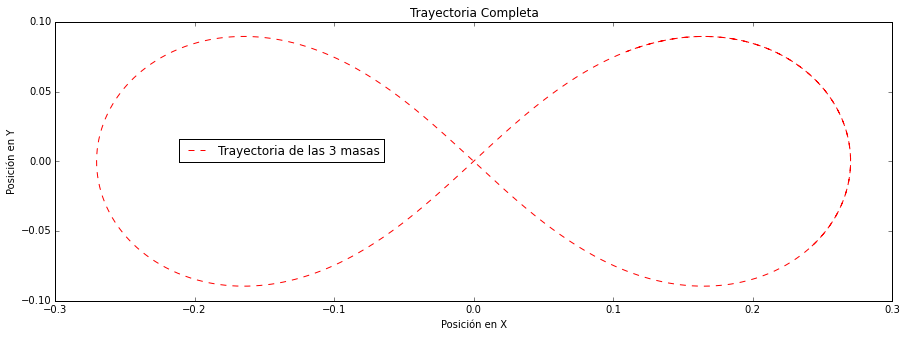

In [6]:
figure(figsize=(15,5))
#graf1 = subplot2grid((20,15), (0,0), colspan=4, rowspan = 8)
plot(posiciones[:,0],posiciones[:,1],color = "Red", ls = '--', label = "Trayectoria de las 3 masas")
title(u"Trayectoria Completa")
axis('equal')
xlabel(u"Posición en X")
ylabel(u"Posición en Y")
legend(bbox_to_anchor=(0.4, 0.6))

Luego, se grafican las trayectorias de las tres masas realizadas hasta media unidad de tiempo, implementando para cada una el método de Runge-Kutta.

In [7]:
Y=np.array([a, b, -a ,-b , 0, 0, c, d, c, d, -2*c, -2*d]) #Condiciones iniciales
tmax=0.5 #Tiempo máximo de iteración. 1 es vuelta entera. 0.5 media vuelta
t=0. #Tiempo de iteración.
Deltat=tmax/1000
posiciones=np.array([[Y[0], Y[1], Y[2], Y[3], Y[4], Y[5]]])
for i in range(1000):
    Kutta()
    posiciones=np.append(posiciones,[[Y[0], Y[1], Y[2], Y[3], Y[4], Y[5]]],axis=0)

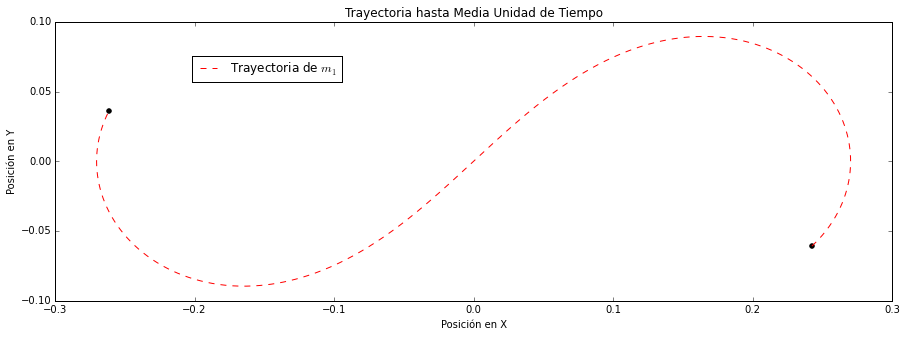

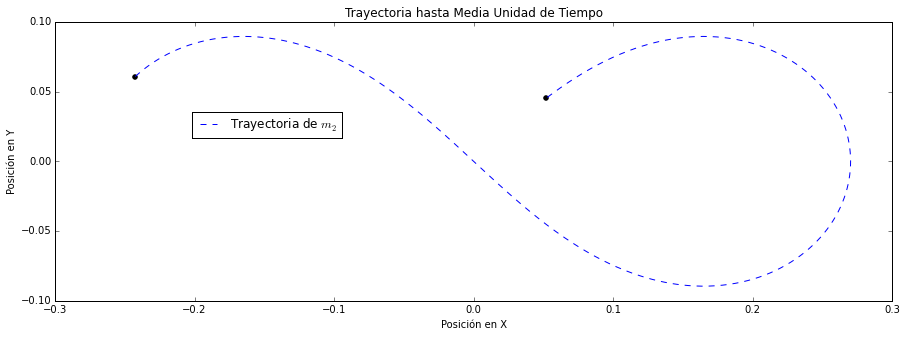

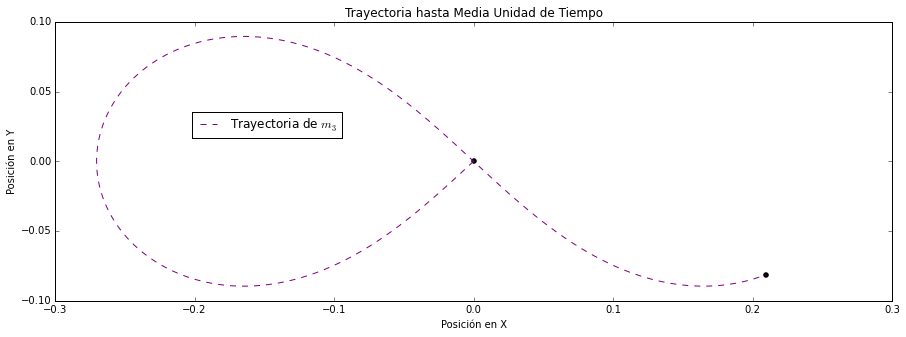

In [8]:
#Mostrar trayectoria de la masa 1.
figure(figsize=(15,5))
plot(posiciones[:,0],posiciones[:,1],color = "Red", ls = '--', label = "Trayectoria de $m_1$")
scatter(posiciones[0,0], posiciones[0,1], color = "Black")
scatter(posiciones[1000,0], posiciones[1000,1], color = "Black")
title(u"Trayectoria hasta Media Unidad de Tiempo")
axis('equal')
xlabel(u"Posición en X")
ylabel(u"Posición en Y")
legend(bbox_to_anchor=(0.35, 0.9))
#savefig(u"MediaTrayectoria1.png")
#Mostrar trayectoria de la masa 2.
figure(figsize=(15,5))
plot(posiciones[:,2],posiciones[:,3],color = "Blue", ls = '--', label = "Trayectoria de $m_2$")
scatter(posiciones[0,2], posiciones[0,3], color = "Black")
scatter(posiciones[1000,2], posiciones[1000,3], color = "Black")
title(u"Trayectoria hasta Media Unidad de Tiempo")
axis('equal')
xlabel(u"Posición en X")
ylabel(u"Posición en Y")
legend(bbox_to_anchor=(0.35, 0.7))
#savefig(u"MediTrayectoria2.png")
#Mostrar trayectoria de la masa 3.
figure(figsize=(15,5))
plot(posiciones[:,4],posiciones[:,5],ms=1, color = "Purple", ls = '--', label = "Trayectoria de $m_3$")
scatter(posiciones[0,4], posiciones[0,5], color = "Black")
scatter(posiciones[1000,4], posiciones[1000,5], color = "Black")
title(u"Trayectoria hasta Media Unidad de Tiempo")
axis('equal')
xlabel(u"Posición en X")
ylabel(u"Posición en Y")
legend(bbox_to_anchor=(0.35, 0.7))
#savefig(u"MediaTrayectoria3.png")

##B)

Para calcular el periodo de las trayectorias estudiadas, se asume que a pesar de ser periódicos los tres movimientos, pueden tener periodos distintos. Para determinar cada uno, se visualiza primero la evolución de los componentes X y Y de posición de cada masa a medida que avanza el tiempo.

In [9]:
#Calcular el periodo
Y=np.array([a, b, -a ,-b , 0, 0, c, d, c, d, -2*c, -2*d]) #Condiciones iniciales
tmax=1 #Tiempo máximo de iteración. 1 es vuelta entera. 0.5 media vuelta
t=0. #Tiempo de iteración.
Deltat=tmax/1000
posiciones=np.array([[t, Y[0], Y[1], Y[2], Y[3], Y[4], Y[5]]])
for i in range(1000):
    Kutta()
    posiciones=np.append(posiciones,[[t, Y[0], Y[1], Y[2], Y[3], Y[4], Y[5]]],axis=0)

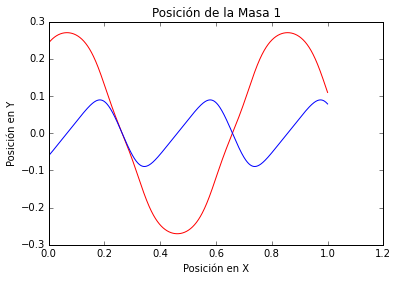

In [10]:
plot(posiciones[:,0], posiciones[:,1], color = "Red")
plot(posiciones[:,0], posiciones[:,2], color = "Blue")
title(u"Posición de la Masa 1")
xlabel(u"Posición en X")
ylabel("Posición en Y")

Observando que hay una clara periodicidad, se procede entonces a calcular el vector posición r de cada masa con respecto al origen, de manera que se visualize una periodicidad unificada.

In [11]:
radios = [] #Posiciones de la masa 1.
for i in range(1001):
    actual = posiciones[:,1][i]**2 + posiciones[:,2][i]**2
    raiz = sqrt(actual)
    radios.append(raiz)
print(size(radios))

1001


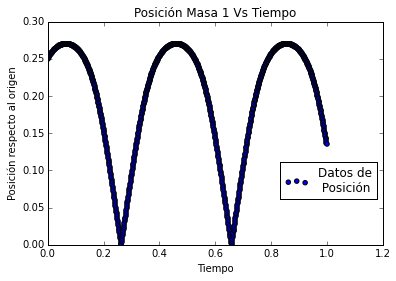

In [12]:
scatter(posiciones[:,0], radios, label = "Datos de\n Posición")
xlim(0,1.2)
ylim(0, 0.3)
title("Posición Masa 1 Vs Tiempo")
xlabel("Tiempo")
ylabel("Posición respecto al origen")
legend(bbox_to_anchor=(1, 0.4))

Viendo ahora la periodicidad presente en los datos de posición con respecto al origen de la masa 1 a lo largo de su órbita, se procede ahora a dividir este conjunto de datos en cortes, de manera que los mínimos y máximos locales que se observan ahora se conviertan en mínimos y máximos globales dentro de los datos cortados.

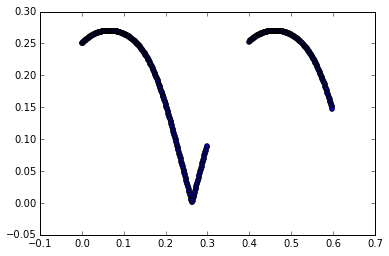

In [13]:
tiempos = posiciones[:,0]
scatter(tiempos[0:300], radios[0:300])
scatter(tiempos[400:600], radios[400:600])

In [14]:
#Partición de datos
corteRadios1 = radios[0:300]
corteRadios2 = radios[400:600]
corteTiempos1 = tiempos[0:300]
corteTiempos2 = tiempos[400:600]

#Obtención de máximos locales
maximo1 = max(corteRadios1)
maximo2 = max(corteRadios2)

#Obtención de tiempos correspondientes
tiempo1 = 0
tiempo2 = 0
for i in range(len(corteTiempos1)):
    tiempoActual = corteTiempos1[i]
    datoActual = corteRadios1[i]
    if(datoActual == maximo1):
        tiempo1 = tiempoActual

for k in range(len(corteTiempos2)):
    tiempoActual = corteTiempos2[k]
    datoActual = corteRadios2[k]
    if(datoActual == maximo2):
        tiempo2 = tiempoActual

#Determinación del periodo
periodo = tiempo2 - tiempo1
print(np.round(periodo, 4))

0.395


Viendo que este procedimiento resulta efectivo, se realiza entonces paras las masas 2 y 3 en sus respectivas trayectorias.

In [15]:
radios2 = [] #Posiciones de la masa 2.
for i in range(1001):
    actual = posiciones[:,3][i]**2 + posiciones[:,4][i]**2
    raiz = sqrt(actual)
    radios2.append(raiz)

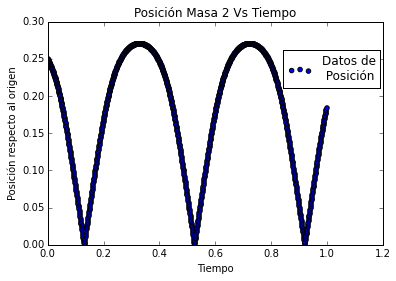

In [16]:
scatter(posiciones[:,0], radios2, label = "Datos de\n Posición")
title("Posición Masa 2 Vs Tiempo")
xlabel("Tiempo")
ylabel("Posición respecto al origen")
xlim(0,1.2)
ylim(0,0.3)
legend(bbox_to_anchor=(1.01, 0.9))

In [17]:
#Partición de datos
corteRadios21 = radios2[0:300]
corteRadios22 = radios2[400:600]
corteTiempos21 = tiempos[0:300]
corteTiempos22 = tiempos[400:600]

#Obtención de máximos locales
minimo21 = min(corteRadios21)
minimo22 = min(corteRadios22)

#Obtención de tiempos correspondientes
tiempo21 = 0
tiempo22 = 0
for i in range(len(corteTiempos21)):
    tiempoActual = corteTiempos21[i]
    datoActual = corteRadios21[i]
    if(datoActual == minimo21):
        tiempo21 = tiempoActual

for k in range(len(corteTiempos22)):
    tiempoActual = corteTiempos22[k]
    datoActual = corteRadios22[k]
    if(datoActual == minimo22):
        tiempo22 = tiempoActual

#Determinación del periodo
periodo = tiempo22 - tiempo21
print(periodo)

0.395


Con la realización de los procedimientos anteriores, se puede concluir que las tres masas se mueven en trayectorias de igual periodo. La única diferencia es el desfase presentado en las posiciones, lo cual se debe a las condiciones iniciales de posición y velocidad de estas. Sin embargo, el análisis se basa en el primer instante en el que las distancias radiales coinciden. Por la simetría de las trayectorias analizadas se puede observar que esta condición se cumple dos veces a lo largo de todo el recorrido, de manera que el periodo viene dado por la separación entre máximos con uno de por medio. Entonces, si la separación entre máximos es de **0.395**, el periodo será de **0.790** aproximadamente.

##C)

Para realizar la animación, utilicé la plantilla presentada en el notebook de clase. Sin embargo, para fallas que se presentaron por mi propio computador, se utilizó el programa **ffmpeg** para crear la animación. Estas modificaciones están comentadas.

KeyboardInterrupt: 

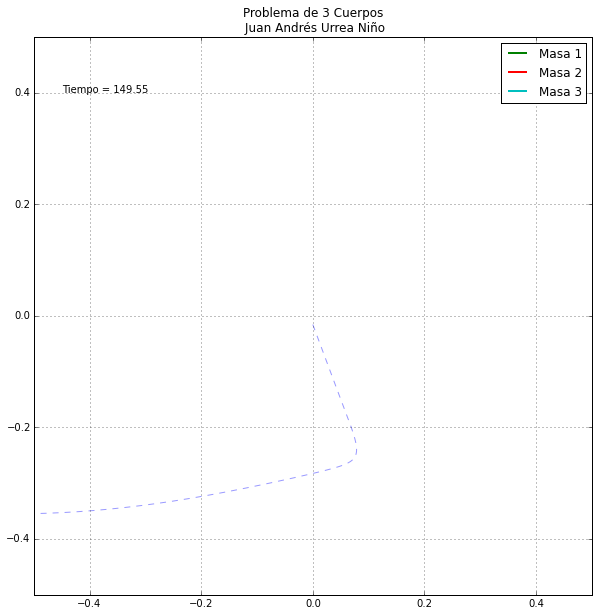

In [642]:
t=posiciones[:,0] #Tiempos
x1=posiciones[:,1] #Posiciones en X y Y de cada masa.
x2=posiciones[:,3]
x3=posiciones[:,5]
y1=posiciones[:,2]
y2=posiciones[:,4]
y3=posiciones[:,6]

fig=figure(figsize=(10,10)) #Crear la figura que contiene la animación.
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-0.5, 0.5), ylim=(-0.5, 0.5))
ax.grid(True)
ax.set_aspect('equal')
#Se utliza el programa ffmpg instalado en la dirección de mi computador
plt.rcParams['animation.ffmpeg_path'] = '/usr/bin/ffmpeg'

mapa = ax.plot(x1,y1,"--",alpha=0.4)
#Se fija la órbita.

title("Problema de 3 Cuerpos\n Juan Andrés Urrea Niño")

#Se definen las trayectorias de cada masa.
trayectory1, = ax.plot([], [], '-', lw=2,label="Masa 1")
trayectory2, = ax.plot([], [], '-', lw=2,label="Masa 2")
trayectory3, = ax.plot([], [], '-', lw=2,label="Masa 3")

planet1, = ax.plot([], [], 'ok', lw=2)
planet2, = ax.plot([], [], 'ok', lw=2)
planet3, = ax.plot([], [], 'ok', lw=2)

legend()
time_template = 'Tiempo = %.2f'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)
dt = 0.05

def animate(i):
    if( i<10 ):
        mini=0
    else:
        mini=i-10
    X1 = x1[mini:i]
    Y1 = y1[mini:i]
    X2 = x2[mini:i]
    Y2 = y2[mini:i]
    X3 = x3[mini:i]
    Y3 = y3[mini:i]

    trayectory1.set_data(X1, Y1)
    trayectory2.set_data(X2, Y2)
    trayectory3.set_data(X3, Y3)
    
    planet1.set_data([x1[i]],[y1[i]])
    planet2.set_data([x2[i]],[y2[i]])
    planet3.set_data([x3[i]],[y3[i]])
    time_text.set_text(time_template%(i*dt))
    return trayectory1, trayectory2, trayectory3, planet1, planet2, planet3, time_text



trayectorias = animation.FuncAnimation(fig, animate, np.arange(1, len(t)),interval=10, blit=False)
FFwriter = animation.FFMpegWriter() #Se llama al programa para ser utilizado.

#Se dan los parámetros que permiten crear la animación.
trayectorias.save("gravitacionFinal.mp4", writer = FFwriter, fps=20, extra_args=['-vcodec', 'libx264'])
show()
#la animación creada se encuentra en GitHub aparte.

#Punto 2

##a)

In [892]:
#funcion: derivada
def funcion2(Y):
    #Distancia de 1 a 3.
    r13 = (np.sqrt(abs(Y[0] - Y[4])**2 + abs(Y[1] - Y[5])**2))**3
    #Distancia de 1 a 2
    r12 = (np.sqrt(abs(Y[0] - Y[2])**2 + abs(Y[1] - Y[3])**2))**3
    #Distancia de 2 a 3.
    r23 = (np.sqrt(abs(Y[2] - Y[4])**2 + abs(Y[3] - Y[5])**2))**3
    #Distancia de 1 a 4.
    r14 = (np.sqrt(abs(Y[0] - Y[6])**2 + abs(Y[1] - Y[7])**2))**3
    #Distancia de 2 a 4.
    r24 = (np.sqrt(abs(Y[2] - Y[6])**2 + abs(Y[3] - Y[7])**2))**3
    #Distancia de 3 a 4.
    r34 = (np.sqrt(abs(Y[4] - Y[6])**2 + abs(Y[5] - Y[7])**2))**3
    
    actual1x = -(Y[0] - Y[2])/r12 - (Y[0] - Y[4])/r13 - (Y[0] - Y[6])/r14
    actual1y = -(Y[1] - Y[3])/r12 - (Y[1] - Y[5])/r13 - (Y[1] - Y[7])/r14
    actual2x = -(Y[2] - Y[0])/r12 - (Y[2] - Y[4])/r23 - (Y[2] - Y[6])/r24
    actual2y = -(Y[3] - Y[1])/r12 - (Y[3] - Y[5])/r23 - (Y[3] - Y[7])/r24
    actual3x = -(Y[4] - Y[0])/r13 - (Y[4] - Y[2])/r23 - (Y[4] - Y[6])/r34
    actual3y = -(Y[5] - Y[1])/r13 - (Y[5] - Y[3])/r23 - (Y[5] - Y[7])/r34
    actual4x = -(Y[6] - Y[0])/r14 - (Y[6] - Y[2])/r24 - (Y[6] - Y[4])/r34
    actual4y = -(Y[7] - Y[1])/r14 - (Y[7] - Y[3])/r24 - (Y[7] - Y[5])/r34
    return np.array([Y[8], Y[9], Y[10], Y[11], Y[12], Y[13], Y[14], Y[15], actual1x, actual1y, actual2x, actual2y, actual3x, actual3y, actual4x, actual4y])
#Aquí se devuelven 12 elementos. Del 0 al 5 son velocidades. Del 6 al 11 son las aceleraciones.

In [893]:
#Y1 = np.array([e1, 0, -f1, -g, -l, 0, -h, g, 0, X, -i, -j, 0, k, i, -j])
def Kutta2(): #Escalón de Runge-Kutta
    global Deltat1
    global Y1
    global limite
    K1 = funcion2(Y1) #Constantes de avance
    K2 = funcion2(Y1 + Deltat1*(1./2.*K1))
    K3 = funcion2(Y1 + Deltat1*(1./2.*K2))
    K4 = funcion2(Y1 + Deltat1*K3)
    Y1+= Deltat1 * (1/6.*K1 + 1/3. * K2 + 1/3.*K3 + 1/6.*K4) #Actualizar variables de iteración.

In [949]:
#Arreglo de condiciones iniciales
e1 = 0.384277200514
f1 = 0.0156823005697
g = 0.13966430504
h = 0.0156823005697
i = 2.01155925929
j = 1.19817066623
k = 1.63619158614
l = 0.352912599375
X = 0.9 #Valor base de la incógnita.

In [997]:
Y1 = np.array([e1, 0, -f1, -g, -l, 0, -h, g, 0 , X, -i, -j, 0, k , i, -j]) #Condiciones iniciales
#Arreglo de posiciones y velocidades.
posiciones = np.array([[Y1[0], Y1[1], Y1[2], Y1[3], Y1[4], Y1[5], Y1[6], Y1[7], Y1[8], Y1[9], Y1[10], Y1[11], Y1[12], Y1[13], Y1[14], Y1[15]]])
Deltat1 = 3.33*10**(-4) #Se utiliza el delta del ejercicio.

In [951]:
#Función para estimar la separación entre el punto final y el punto inicial de la trayectoria.
#Recibe como parámetro la componente Y de la velocidad inicial de la masa 1.
def probar(A):
    global Y1 #Utilizar el arreglo de condiciones iniciales.
    global Deltat1 #utilizar el Delta establecido.
    Y1 = np.array([e1, 0, -f1, -g, -l, 0, -h, g, 0 , A, -i, -j, 0, k , i, -j])
    posiciones = array([[Y1[0], Y1[1], Y1[2], Y1[3], Y1[4], Y1[5], Y1[6], Y1[7]]])
    periodo = 1
    limite = 0
    while (limite < periodo): #Se realiza en un solo periodo.
        Kutta2()
        posiciones=np.append(posiciones,[[Y1[0], Y1[1], Y1[2], Y1[3], Y1[4], Y1[5], Y1[6], Y1[7]]] ,axis = 0)
        limite += Deltat1
    XX = posiciones[-1,0] #Coordenada X final de la Masa 1.
    YY = posiciones[-1,1] #Coordenada Y final de la Masa 2.
    difY = YY #Se comparan posiciones incial y final.
    difX = XX - e1
    radio = sqrt(difX **2 + difY**2) #Se calcula la distancia entre punto inicial y final.
    return radio #Retornar la magnitud de la separación entre puntos.

In [953]:
#Ya que no pude vectorizar la función para ingresarle un parámetro de arreglo, obtengo ambos arreglos a graficar como listas.
enY = [] #Arreglo vacío de separaciones.
iterativa = 0.7 #Límite inferior de la variable iterativa.
while(iterativa <= 0.78): #Llega hasta 0.78
    actual = probar(iterativa) #Calcular la separación para cada valor del intervalo.
    enY.append(actual)
    iterativa += 0.001 #Actualizar el arreglo y la variable de iteración.

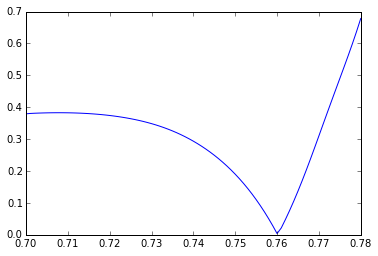

In [954]:
enX = linspace(0.700, 0.7800, len(enY))
plot(enX,enY)

Si la función se vuelve 0 en ese punto misterioso, su derivada cambiará de signo en ese mismo punto.

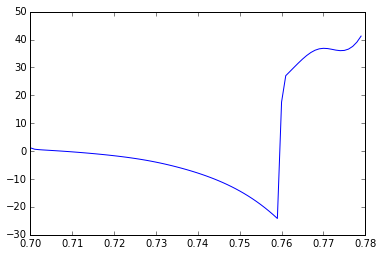

In [955]:
#Calcular derivada usando forward difference. Me baso en el notebook de Juan David.
h = (0.78 - 0.7)/(len(enY))
enYForward = np.roll(enY, -1)
dy = (enYForward - enY)/h
dy1 = dy[:-1]
plot(enX[:-1], dy1)

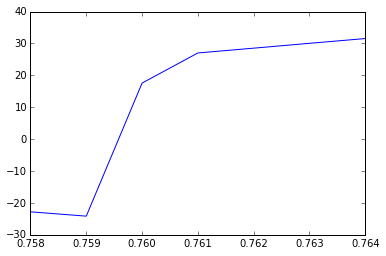

In [972]:
#Se recortan los datos alrededor del punto de interés.
nuevoX = enX[:-1][58:65]
nuevoY = dy1[58:65]
plot(nuevoX, nuevoY)

Es posible notar que la vecindad del punto donde la función cambia de signo se comporta como una recta, por lo que será posible utilizar interpolación de **Lagrange** para hallar dicha recta y el valor en el que se anula.

In [975]:
nuevosX = [] #Se recortan los arreglos.
nuevosY = []
for i in range(len(nuevoY)):
    actualX = nuevoX[i]
    actualY = nuevoY[i]
    if((actualX >= 0.759) & (actualX <= 0.760)):
        nuevosX.append(actualX)
        nuevosY.append(actualY)

In [977]:
#Una vez se obtienen los extremos de la recta, se utiliza la interpolación de Lagrange
print(nuevosX, nuevosY)

[0.75900000000000001, 0.76000000000000001] [-24.147981442153501, 17.57920068182332]


In [978]:
print(lagrange(nuevosX, nuevosY))

 
4.173e+04 x - 3.17e+04


In [979]:
def ajuste(x):
    return x*4.173*10**4 - 3.17*10**4

In [980]:
print(root(ajuste, 1))

       r: array([-41730.])
       x: array([ 0.75964534])
    fjac: array([[-1.]])
 message: 'The solution converged.'
 success: True
    nfev: 4
     fun: array([ 0.])
     qtf: array([  2.18751666e-08])
  status: 1


Como se puede observar por la solución hallada a la interpolación de Lagrange realizada, el valor de a para el cual la función de la segunda derivada cambia de signo es 0.75965, aproximando a 5 cifras decimales significativas.

##B)

In [1065]:
def K(x): #X será el tiempo, añadiendo cada array sucesivamente.
    #Se asume masa como 1, por lo que solo se suman las velocidades al cuadrado de X y Y de cada masa.
    v1 = posiciones[x,8]**2
    v2 = posiciones[x,9]**2
    v3 = posiciones[x,10]**2
    v4 = posiciones[x,11]**2
    v5 = posiciones[x,12]**2
    v6 = posiciones[x,13]**2
    v7 = posiciones[x,14]**2
    v8 = posiciones[x,15]**2
    energia = v1+v2+v3+v4+v5+v6+v7+v8
    return energia/2

In [1058]:
def P(x): #X será el tiempo, añadiendo cada array sucesivamente.
    #Cada masa posee energía potencial con respecto a las otras tres, y todo esto se debe sumar.
    #Asumiendo masas y G como 1, es 1/r.
    #Se calcula el radio relativo entre cada masa con las otras.
    p12 = 1/(sqrt((abs(posiciones[x,0] - posiciones[x,2]))**2 + (abs(posiciones[x,1] - posiciones[x,3]))**2))
    p13 = 1/(sqrt((abs(posiciones[x,0] - posiciones[x,4]))**2 + (abs(posiciones[x,1] - posiciones[x,5]))**2))
    p14 = 1/(sqrt((abs(posiciones[x,0] - posiciones[x,6]))**2 + (abs(posiciones[x,1] - posiciones[x,7]))**2))
    p23 = 1/(sqrt((abs(posiciones[x,2] - posiciones[x,4]))**2 + (abs(posiciones[x,5] - posiciones[x,3]))**2))
    p24 = 1/(sqrt((abs(posiciones[x,2] - posiciones[x,6]))**2 + (abs(posiciones[x,3] - posiciones[x,7]))**2))
    p34 = 1/(sqrt((abs(posiciones[x,4] - posiciones[x,6]))**2 + (abs(posiciones[x,5] - posiciones[x,7]))**2))
    pT = -(p34+p24+p23+p14+p13+p12)
    return pT

In [1059]:
#Se ejecuta Runge-Kutta para terner el arreglo de posiciones.
delta = 3.33*10**(-4)
Y1 = np.array([e1, 0, -f1, -g, -l, 0, -h, g, 0 , 0.76016, -i, -j, 0, k , i, -j])
posiciones = array([[Y1[0], Y1[1], Y1[2], Y1[3], Y1[4], Y1[5], Y1[6], Y1[7], Y1[8], Y1[9], Y1[10], Y1[11], Y1[12], Y1[13], Y1[14], Y1[15]]])
periodo = 1
limite = 0
while (limite < periodo):
    Kutta2()
    posiciones=np.append(posiciones,[[Y1[0], Y1[1], Y1[2], Y1[3], Y1[4], Y1[5], Y1[6], Y1[7], Y1[8], Y1[9], Y1[10], Y1[11], Y1[12], Y1[13], Y1[14], Y1[15]]] ,axis = 0)
    limite += delta

In [1060]:
#El tiempo total es el largo del arreglo de posiciones/velocidades
Ps = [] #Energías potenciales
Ks = [] #Energías cinéticas.
Ms = [] #Energías Totales.
tiempo = [] #Tiempo transcurriendo.
for i in range(len(posiciones)): #cada instante es un array de posiciones y velocidades.
    actualP = P(i) #Se aÑaden uno a uno los términos de las tres energía y el tiempo dividido en deltas.
    actualK = K(i)
    actualM = actualP + actualK
    actualTiempo = delta*i
    Ps.append(actualP)
    Ks.append(actualK)
    Ms.append(actualM)
    tiempo.append(actualTiempo)

##Animación

De nuevo tomando como guía el notebook correspondiente a la realización de animaciones, se ajusta para ahora contener los cuatro cuerpos.

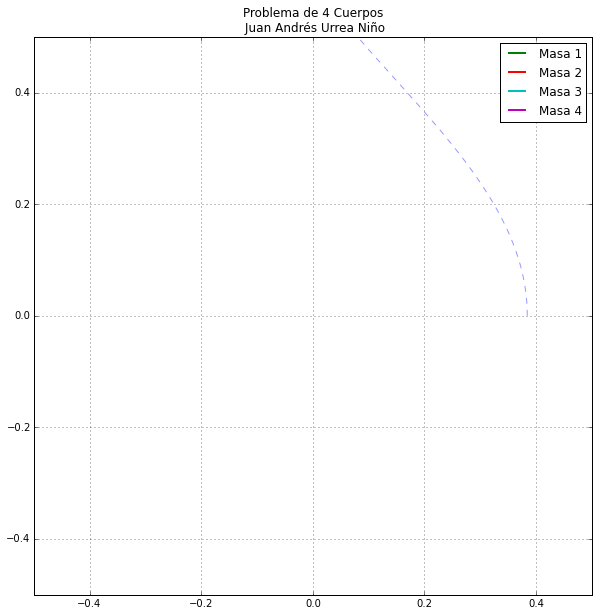

In [1035]:
x1=posiciones[:,0] #Posiciones en X y Y de cada masa.
x2=posiciones[:,2]
x3=posiciones[:,4]
x4=posiciones[:,6]
y1=posiciones[:,1]
y2=posiciones[:,3]
y3=posiciones[:,5]
y4=posiciones[:,7]

fig=figure(figsize=(10,10)) #Crear la figura que contiene la animación.
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-0.5, 0.5), ylim=(-0.5, 0.5))
ax.grid(True)
ax.set_aspect('equal')
#Se utliza el programa ffmpg instalado en la dirección de mi computador
plt.rcParams['animation.ffmpeg_path'] = '/usr/bin/ffmpeg'

mapa = ax.plot(x1,y1,"--",alpha=0.4)
#Se fija la órbita.

title("Problema de 4 Cuerpos\n Juan Andrés Urrea Niño")

#Se definen las trayectorias de cada masa.
trayectory1, = ax.plot([], [], '-', lw=2,label="Masa 1")
trayectory2, = ax.plot([], [], '-', lw=2,label="Masa 2")
trayectory3, = ax.plot([], [], '-', lw=2,label="Masa 3")
trayectory4, = ax.plot([], [], '-', lw=2,label="Masa 4")

planet1, = ax.plot([], [], 'ok', lw=2) #Se grafica cada paneta como un punto.
planet2, = ax.plot([], [], 'ok', lw=2)
planet3, = ax.plot([], [], 'ok', lw=2)
planet4, = ax.plot([], [], 'ok', lw=2)

legend()
dt = 0.05

def animate(i): #La función animadora que define las "colas" de los planetas y los movimientos de estos.
    if( i<10 ):
        mini=0
    else:
        mini=i-10
    X1 = x1[mini:i]
    Y1 = y1[mini:i]
    X2 = x2[mini:i]
    Y2 = y2[mini:i]
    X3 = x3[mini:i]
    Y3 = y3[mini:i]
    X4 = x4[mini:i]
    Y4 = y4[mini:i]

    trayectory1.set_data(X1, Y1)
    trayectory2.set_data(X2, Y2)
    trayectory3.set_data(X3, Y3)
    trayectory4.set_data(X4, Y4)
    
    planet1.set_data([x1[i]],[y1[i]])
    planet2.set_data([x2[i]],[y2[i]])
    planet3.set_data([x3[i]],[y3[i]])
    planet4.set_data([x4[i]],[y4[i]])
    return trayectory1, trayectory2, trayectory3, trayectory4, planet1, planet2, planet3, planet4



trayectorias = animation.FuncAnimation(fig, animate, np.arange(1, len(x1)),interval=10, blit=False)
FFwriter = animation.FFMpegWriter() #Se llama al programa para ser utilizado.

#Se dan los parámetros que permiten crear la animación.
trayectorias.save("gravitacion4.mp4", writer = FFwriter, fps=15, extra_args=['-vcodec', 'libx264'])
show()